## Train data exploration

In [33]:
import dask.dataframe as dd

In [34]:
train_data = dd.read_parquet('../input/child-mind-institute-detect-sleep-states/train_series.parquet', engine='pyarrow')

In [35]:
## Number of participants
ids = train_data['series_id'].unique().compute()
print(f"There are {len(ids)} participants")

There are 277 participants


In [37]:
# Number of step ranges
# is there one range per perticipant ?
step_ranges = train_data.loc[train_data['step'] == 1].compute()
print(f"There are {len(step_ranges)} step ranges")

There are 277 step ranges


In [38]:
## Number of entries in for each participant
participant_entry_counts = train_data.groupby('series_id').size().compute()
print(participant_entry_counts)

series_id
038441c925bb    389880
03d92c9f6f8a    724140
0402a003dae9    397260
04f547b8017d    637560
05e1944c3818    400860
                 ...  
fa149c3c4bde    406800
fb223ed2278c    918360
fbf33b1a2c10    421020
fcca183903b7    620640
fe90110788d2    592380
Length: 277, dtype: int64


In [39]:
# Maximum step value
max_step_value = train_data['step'].max().compute()
print(f"Maximum value in 'step' column: {max_step_value}")

Maximum value in 'step' column: 1433879


In [40]:
import matplotlib.pyplot as plt

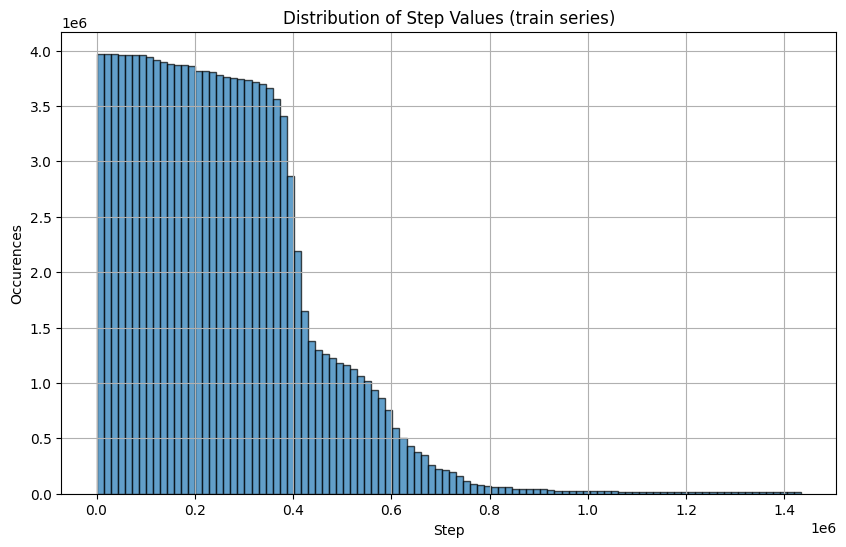

In [41]:
# Step distribution
sampled_data = train_data['step'].compute()
plt.figure(figsize=(10, 6))
plt.hist(sampled_data, bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Step Values (train series)')
plt.xlabel('Step')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()


In [42]:
# Get values for first participant
id1 = ids.values[0]
data_id1 = train_data.loc[train_data['series_id'] == id1].compute()

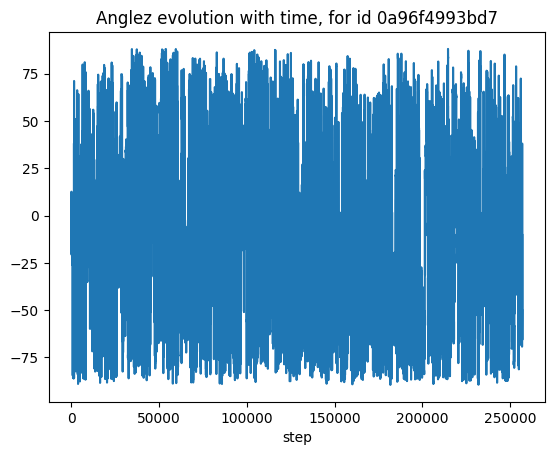

In [43]:
plt.plot(data_id1['step'], data_id1['anglez'])
plt.xlabel("step")
plt.title(f"Anglez evolution with time, for id {id1}")
plt.show()

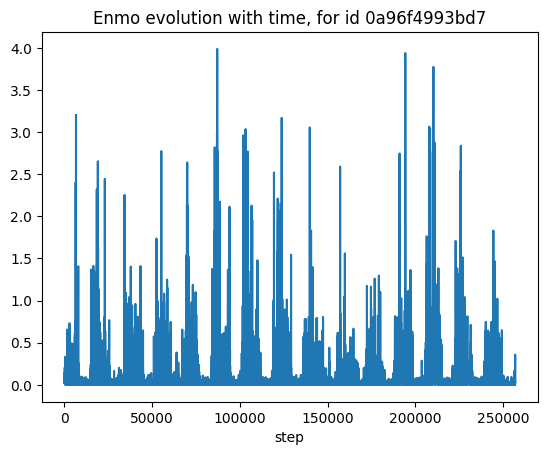

In [44]:
plt.plot(data_id1['step'], data_id1['enmo'])
plt.xlabel("step")
plt.title(f"Enmo evolution with time, for id {id1}")
plt.show()

In [45]:
# Participant 148
id148 = ids.values[147]
data_id148 = train_data.loc[train_data['series_id'] == id148].compute()

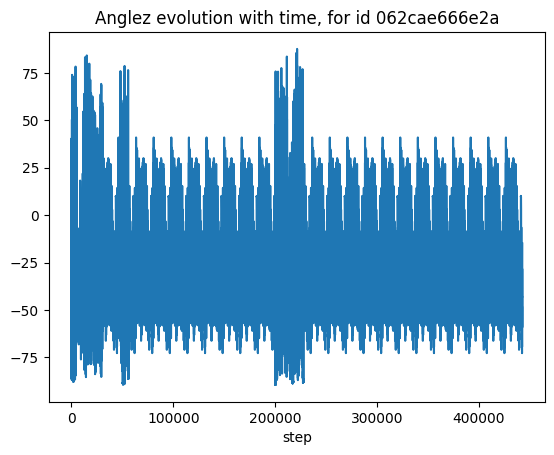

In [46]:
plt.plot(data_id148['step'], data_id148['anglez'])
plt.xlabel("step")
plt.title(f"Anglez evolution with time, for id {id148}")
plt.show()

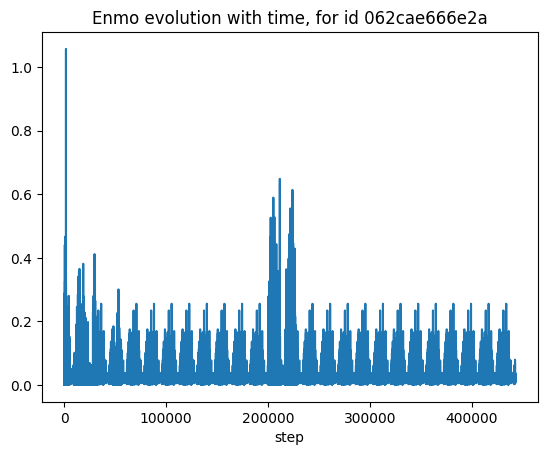

In [47]:
plt.plot(data_id148['step'], data_id148['enmo'])
plt.xlabel("step")
plt.title(f"Enmo evolution with time, for id {id148}")
plt.show()

## Test data exploration

In [48]:
test_data = dd.read_parquet('../input/child-mind-institute-detect-sleep-states/test_series.parquet', engine='pyarrow')

In [49]:
## Number of participants
ids = test_data['series_id'].nunique().compute()
print(f"There are {ids} participants")

There are 3 participants


In [50]:
## Number of entries in for each participant
participant_entry_counts = test_data.groupby('series_id').size().compute()
print(participant_entry_counts)

series_id
038441c925bb    150
03d92c9f6f8a    150
0402a003dae9    150
dtype: int64


In [51]:
# Maximum step value
max_step_value = test_data['step'].max().compute()
print(f"Maximum value in 'step' column: {max_step_value}")

Maximum value in 'step' column: 149


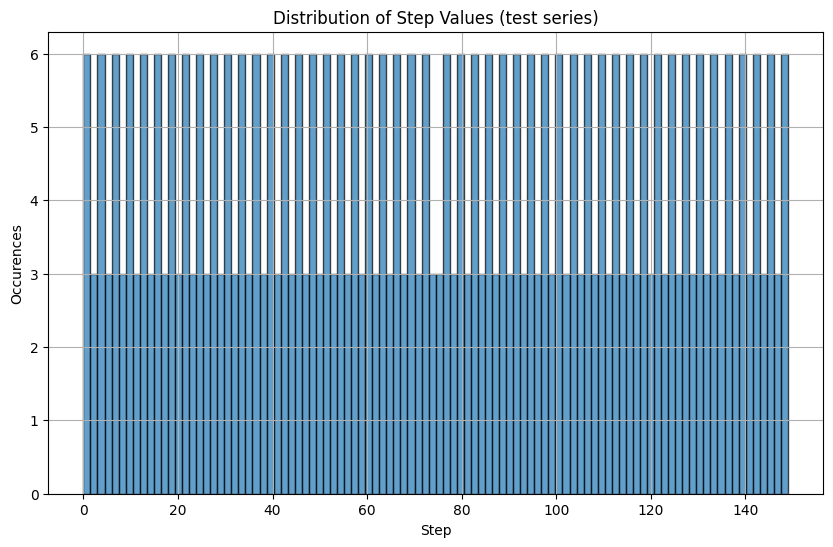

In [52]:
# Step distribution
sampled_data = test_data['step'].compute()
plt.figure(figsize=(10, 6))
plt.hist(sampled_data, bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Step Values (test series)')
plt.xlabel('Step')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

In [53]:
import numpy as np

In [54]:
test_data = test_data.compute()

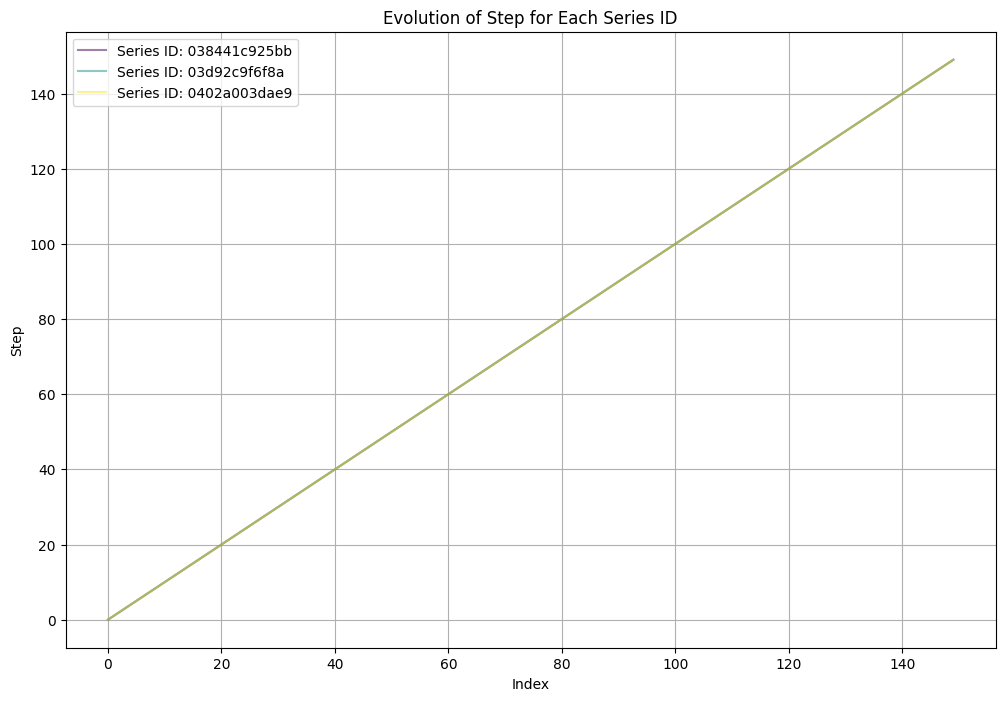

In [55]:
# Create a color map for unique series IDs
test_ids = test_data['series_id'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(test_ids)))
# Plot the evolution of "step" for each series_id
plt.figure(figsize=(12, 8))
for color, series_id in zip(colors, test_ids):
    series_data = test_data[test_data['series_id'] == series_id]
    plt.plot(series_data['step'].values, label=f'Series ID: {series_id}', 
             color=color, alpha=.5)

plt.title('Evolution of Step for Each Series ID')
plt.xlabel('Index')
plt.ylabel('Step')
plt.legend()
plt.grid(True)
plt.show()

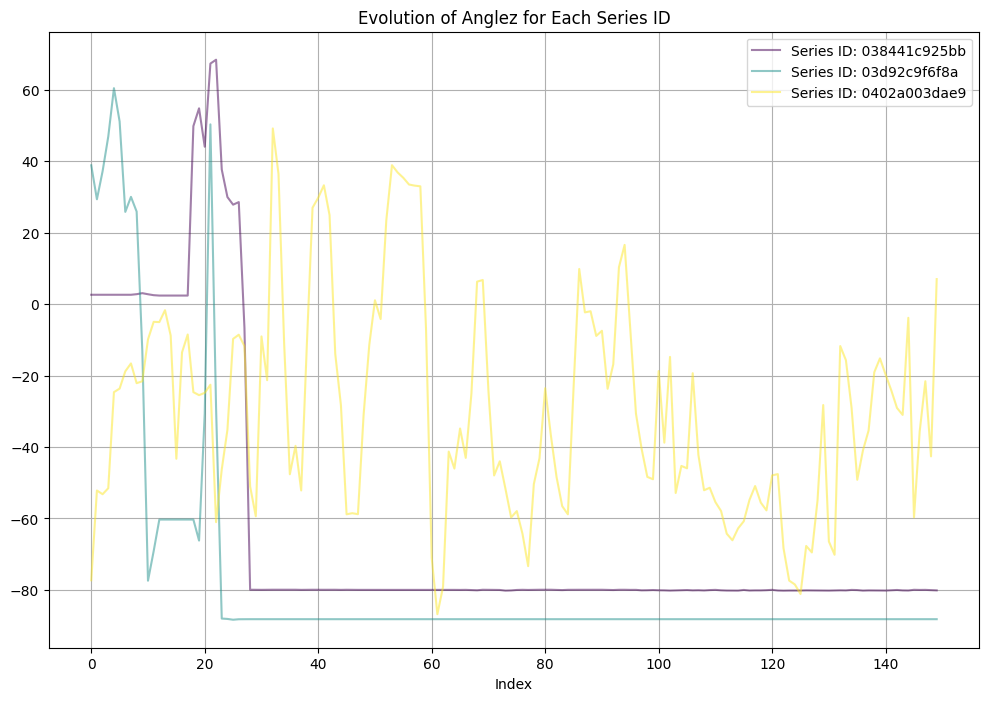

In [56]:
plt.figure(figsize=(12, 8))
for color, series_id in zip(colors, test_ids):
    series_data = test_data[test_data['series_id'] == series_id]
    plt.plot(series_data['step'], series_data['anglez'],
             label=f'Series ID: {series_id}', 
             color=color, alpha=.5)

plt.title('Evolution of Anglez for Each Series ID')
plt.xlabel('Index')
plt.legend()
plt.grid(True)
plt.show()

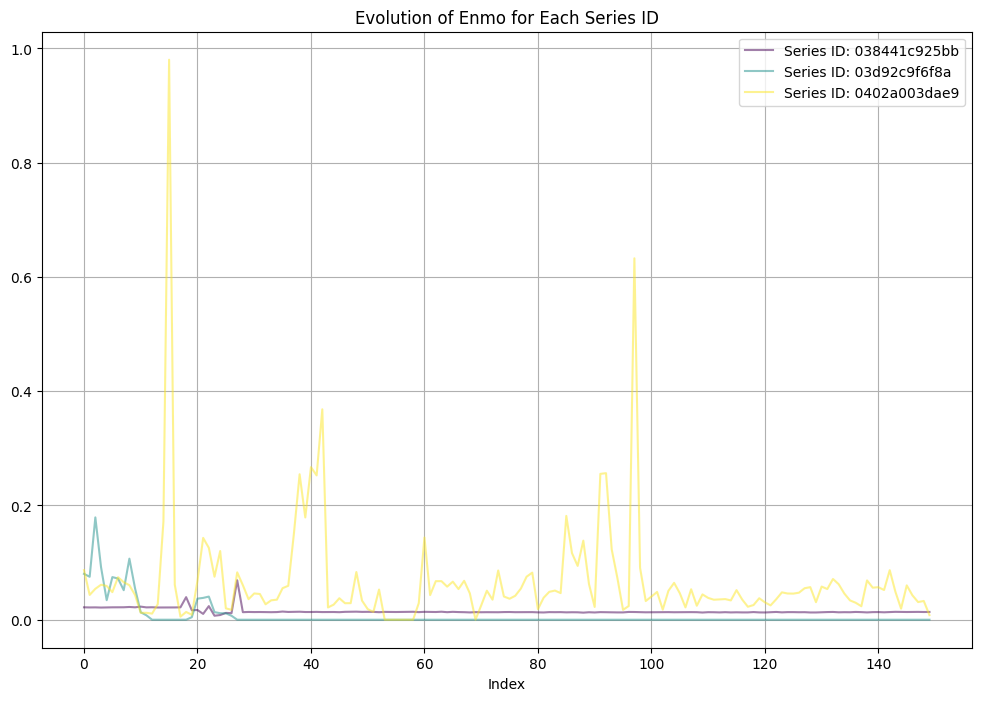

In [57]:
plt.figure(figsize=(12, 8))
for color, series_id in zip(colors, test_ids):
    series_data = test_data[test_data['series_id'] == series_id]
    plt.plot(series_data['step'], series_data['enmo'],
             label=f'Series ID: {series_id}', 
             color=color, alpha=.5)

plt.title('Evolution of Enmo for Each Series ID')
plt.xlabel('Index')
plt.legend()
plt.grid(True)
plt.show()

## Events data exploration

In [77]:
events_data = pd.read_csv('../input/child-mind-institute-detect-sleep-states/train_events.csv')
events_data = events_data.dropna(subset=['timestamp'])

In [78]:
events_data.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


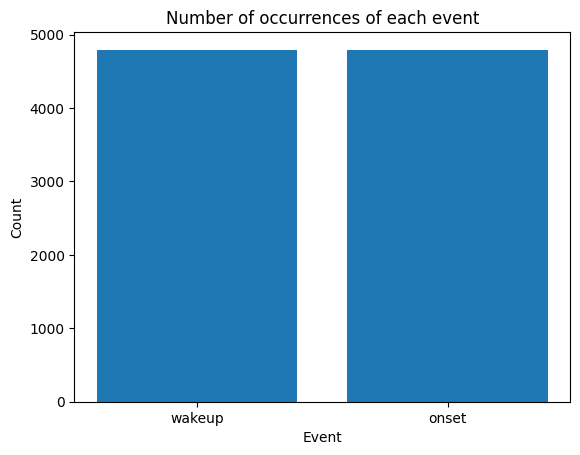

In [79]:
event_counts = events_data['event'].value_counts()
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Number of occurrences of each event')
plt.show()

In [89]:
# Convert the timestamp columns to datetime format
events_data['timestamp'] = pd.to_datetime(events_data['timestamp'], format='%Y-%m-%dT%H:%M:%S%z', utc=True)

print(events_data.head())

      series_id night   event     step                 timestamp
0  038441c925bb     1   onset   4992.0 2018-08-15 02:26:00+00:00
1  038441c925bb     1  wakeup  10932.0 2018-08-15 10:41:00+00:00
2  038441c925bb     2   onset  20244.0 2018-08-15 23:37:00+00:00
3  038441c925bb     2  wakeup  27492.0 2018-08-16 09:41:00+00:00
4  038441c925bb     3   onset  39996.0 2018-08-17 03:03:00+00:00


In [92]:
# Separate onsets and wakeups
onsets = events_data[events_data['event'] == 'onset']
wakeups = events_data[events_data['event'] == 'wakeup']
times_onset = onsets['timestamp'].dt.time
times_wakeup = wakeups['timestamp'].dt.time

earliest_onset_time = min(times_onset)
latest_wakeup_time = max(times_wakeup)

print(f"Earliest onset: {earliest_onset_time}")
print(f"Latest wakeup: {latest_wakeup_time}")

Earliest onset: 00:00:00
Latest wakeup: 21:33:00


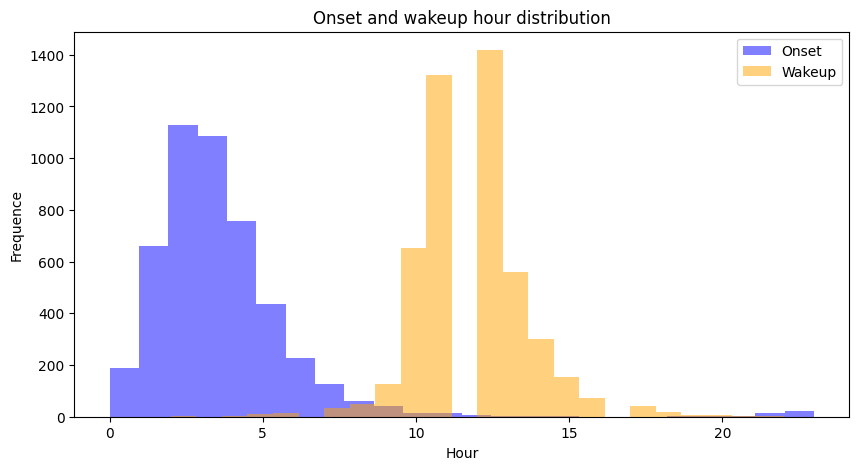

In [96]:
hours_onset = onsets['timestamp'].dt.round('H').dt.hour
hours_wakeup = wakeups['timestamp'].dt.round('H').dt.hour

# plot onset and wakeup time distribution
plt.figure(figsize=(10,5))
plt.hist(hours_onset, bins=24, alpha=0.5, label='Onset', color='blue')
plt.hist(hours_wakeup, bins=24, alpha=0.5, label='Wakeup', color='orange')

# Ajouter des légendes et des titres
plt.xlabel('Hour')
plt.ylabel('Frequence')
plt.title('Onset and wakeup hour distribution')
plt.legend()

# Afficher le plot
plt.show()